# 次元削減

## 主成分分析

主成分分析は学習データの分散が最大になる方向への線形変換を求める手法である。

$d$次元の学習データ$\boldsymbol{x}_i=(x_{i1}, ..., x_{id})^T$が$N$個あるデータ行列を$\boldsymbol{X} = (\boldsymbol{x}_1, ..., \boldsymbol{x}_N)^T$とする。

そこから平均ベクトル$\bar{\boldsymbol{x}}=(\bar{x}_1, ..., \bar{x}_d)^T$を引き算した行列を$\bar{\boldsymbol{X}}=(\boldsymbol{x}_1 - \bar{\boldsymbol{x}}, ..., \boldsymbol{x}_N - \bar{\boldsymbol{x}})^T$とおけば、共分散行列$\boldsymbol{\Sigma}$は

$$
\boldsymbol{\Sigma} = Var[\bar{\boldsymbol{X}}]
= \frac{1}{N} \bar{\boldsymbol{X}}^T \bar{\boldsymbol{X}}
$$

で定義される。


係数ベクトル$\boldsymbol{a}_j = (a_{j1}, ..., a_{jd})^T (j=1, ..., d)$を用いて$\bar{\boldsymbol{X}}$を線形変換したものを$\boldsymbol{s}_j$とする。

$$
\boldsymbol{s}_j = (s_{1j}, ..., s_{Nj})^T = \bar{\boldsymbol{X}} \boldsymbol{a}_j
$$

このデータの分散は

$$
\begin{align}
Var[\boldsymbol{s}_j]
= \frac{1}{N} \boldsymbol{s}_j^T \boldsymbol{s}_j\\
= \frac{1}{N} (\bar{\boldsymbol{X}} \boldsymbol{a}_j)^T \bar{\boldsymbol{X}} \boldsymbol{a}_j\\
= \frac{1}{N} \boldsymbol{a}_j^T \bar{\boldsymbol{X}}^T \bar{\boldsymbol{X}} \boldsymbol{a}_j\\
= \boldsymbol{a}_j^T Var[\bar{\boldsymbol{X}}] \boldsymbol{a}_j\\
\end{align}
$$

となる。

このまま$\max_{\boldsymbol{a}_j} Var[\boldsymbol{s}_j]$を解くと単に$\boldsymbol{a}_j=\infty$が解になってしまうので、係数ベクトル$\boldsymbol{a}_j$のノルム制約条件をかけた最大化問題を解くことにする。

:::{admonition} 主問題
$$
\max_{\boldsymbol{a}_j} \ Var[\boldsymbol{s}_j]\\
\text{subject to} \ ||\boldsymbol{a}_j||_2^2 = 1
$$
:::

この分散が最大となる射影ベクトルは、ラグランジュ関数

$$
L(\boldsymbol{a}_j) = 
\boldsymbol{a}_j^T Var[\bar{\boldsymbol{X}}] \boldsymbol{a}_j
- \lambda (\boldsymbol{a}_j^T \boldsymbol{a}_j - 1)
$$

を最大にする$\boldsymbol{a}_j$である。（$\lambda$はラグランジュ未定乗数）

微分して0とおけば

$$
\frac{\partial L(\boldsymbol{a}_j)}{\partial \boldsymbol{a}_j}
= 2 Var[\bar{\boldsymbol{X}}] \boldsymbol{a}_j
- 2 \lambda \boldsymbol{a}_j
= 0
$$

より

$$
Var[\bar{\boldsymbol{X}}] \boldsymbol{a}_j = \lambda \boldsymbol{a}_j
$$

となる。

この$\lambda$と$\boldsymbol{a}_j$は固有値問題を解くことにより得られる。


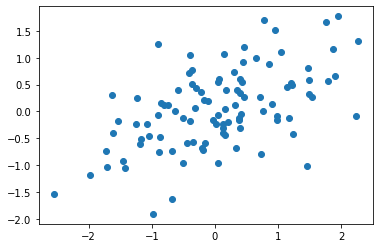

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

w = 0.3
n = 100
x1 = norm.rvs(loc=0, scale=1, size=n, random_state=0)
x2 = w * x1 + (1 - w) * norm.rvs(loc=0, scale=1, size=n, random_state=1)
plt.scatter(x1, x2)